In [72]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt


In [73]:
!ls ../data/

münster-alter fischmarkt-20230228-20230922-hour.csv
münster-ludgeristraße-20230228-20230922-hour.csv
münster-rothenburg-20230228-20230920-hour.csv
münster-salzstraße (west)-20230228-20230922-hour.csv
poi.geojson


In [28]:
df = pd.read_csv('../data/münster-ludgeristraße-20230228-20230922-hour.csv', sep=';')

In [29]:
df.head()

,location,time of measurement,weekday,pedestrians count,temperature in ºc,weather condition,incidents
0,"Ludgeristraße, Münster",2023-03-01 00:00:00 +0100,Wednesday,8,-1,clear-night,NaN
1,"Ludgeristraße, Münster",2023-03-01 01:00:00 +0100,Wednesday,8,-2,clear-night,NaN
2,"Ludgeristraße, Münster",2023-03-01 02:00:00 +0100,Wednesday,7,-2,clear-night,NaN
3,"Ludgeristraße, Münster",2023-03-01 03:00:00 +0100,Wednesday,3,-3,clear-night,NaN
4,"Ludgeristraße, Münster",2023-03-01 04:00:00 +0100,Wednesday,13,-4,clear-night,NaN


In [38]:
df.dtypes

location                            object
time of measurement                 object
weekday                             object
pedestrians count                    int64
temperature in ºc                    int64
weather condition                   object
incidents                          float64
measure_ts             datetime64[ns, UTC]
dtype: object

In [39]:
df['measure_ts'] = pd.to_datetime(df['time of measurement'], tz="Europe/Berlin")

TypeError: to_datetime() got an unexpected keyword argument 'tz'

In [41]:
df[df['pedestrians count'] == df['pedestrians count'].max()]

,location,time of measurement,weekday,pedestrians count,temperature in ºc,weather condition,incidents,measure_ts
1429,"Ludgeristraße, Münster",2023-04-29 14:00:00+02:00,Saturday,6756,14,partly-cloudy-day,NaN,2023-04-29 12:00:00+00:00


In [48]:
df['measure_day'] = df['measure_ts'].dt.date

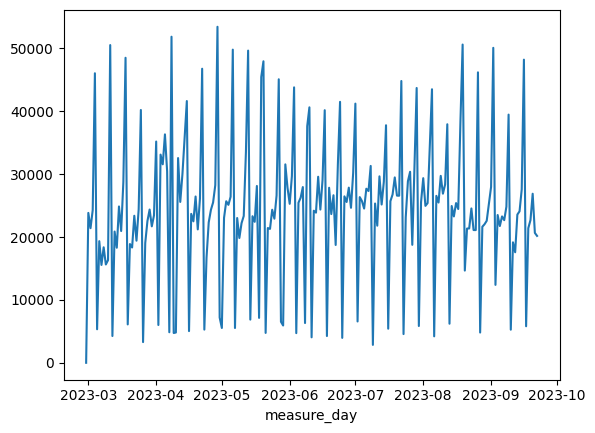

In [76]:
df2 = df.groupby("measure_day")['pedestrians count'].sum().plot()

In [81]:
from pandas.api.types import CategoricalDtype
cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

cat_type = CategoricalDtype(categories=cats, ordered=True)
df['weekday'] = df['weekday'].astype(cat_type)

/var/folders/dh/hs57wp5d1tq9rczy5rg4w3qw0000gn/T/ipykernel_18993/677748688.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df2 = df.groupby("weekday")['pedestrians count'].sum().reindex(cats).plot()


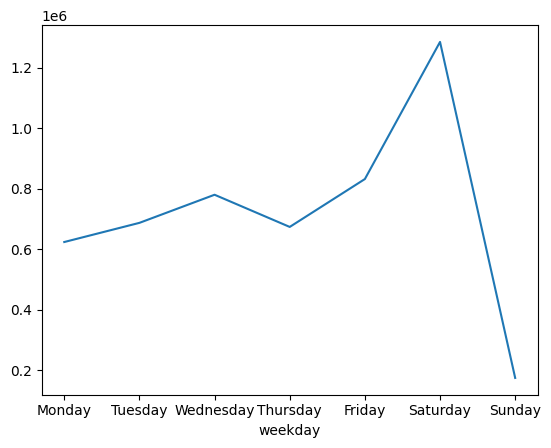

In [82]:
df2 = df.groupby("weekday")['pedestrians count'].sum().reindex(cats).plot()

In [84]:
df_park = pd.read_csv('../parking-decks-muenster/parking-decks-muenster/data/2023-09-21.csv')

In [86]:
display(df_park)

,Datum und Uhrzeit,PH Coesfelder Kreuz,PH Theater,PP Hörsterplatz,PH Alter Steinweg,Busparkplatz,PP Schlossplatz Nord,PP Schlossplatz Süd,PH Aegidii,PP Georgskommende,PH Münster Arkaden,PH Karstadt,PH Stubengasse,PH Bremer Platz,PH Engelenschanze,PH Bahnhofstraße,PH Cineplex,PH Stadthaus 3
0,2023-09-21 00:00,0,566,0,355,0,0,0,750,0,150,157,238,150,304,194,577,214
1,2023-09-21 00:15,0,566,0,355,0,0,0,750,0,150,157,238,150,304,194,577,214
2,2023-09-21 00:30,0,566,0,355,0,0,0,750,0,150,157,238,150,304,194,577,214
3,2023-09-21 00:45,0,566,0,355,0,0,0,750,0,150,157,238,150,304,194,577,214
4,2023-09-21 01:00,0,566,0,355,0,0,0,750,0,150,157,238,150,304,194,577,214
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,2023-09-21 23:35,0,568,0,349,0,0,0,750,0,150,161,232,176,291,199,562,223
236,2023-09-21 23:40,0,568,0,349,0,0,0,750,0,150,161,232,176,291,199,562,223
237,2023-09-21 23:45,0,568,0,349,0,0,0,750,0,150,161,232,176,291,199,562,223
238,2023-09-21 23:50,0,568,0,349,0,0,0,750,0,150,161,232,176,291,199,562,223


In [88]:
{"PH Aegidii":"780", 
     "PH Theater":"748", 
     "PH Alter Steinweg":"390",
     "Münster Arkaden PH":"150",
     "PH Karstadt":"183",
     "PH Bremer Platz": "354"}

{'PH Aegidii': '780',
 'PH Theater': '748',
 'PH Alter Steinweg': '390',
 'Münster Arkaden PH': '150',
 'PH Karstadt': '183',
 'PH Bremer Platz': '354'}